# Olist Marketplace Data Analysis

## Project Overview
Welcome to the Olist Marketplace Data Analysis Project. Olist, as the largest online marketplace in Brazil, is undergoing a comprehensive performance review. Our objective is to delve into the rich dataset of Olist's operations, analyze past performances, and uncover areas for potential growth.

In this Jupyter Notebook, we will explore various facets of Olist's business data, focusing on key aspects like sales volumes, buyer-seller relationships, and product category performances.

## Goals
- **Assess Buyer-Seller Dynamics**: Explore the geographical distribution and relationship between buyers and sellers.
- **Identify Growth Opportunities**: Analyze sales volume trends across different product categories and identify high-potential products.
- **Optimize Marketplace Reach**: Using data-driven insights, pinpoint 'commerce dead zones' to strategize future expansions.

## Data
The dataset includes valuable information such as:
- Product prices and shipping costs
- Seller and buyer locations
- Product details (dimensions, photos, category)
- Customer review scores
- Order statuses and timestamps

**Note**: Each order in the dataset can contain multiple products, adding complexity to our analysis.

## Approach
Our approach involves a mix of exploratory data analysis, statistical testing, and predictive modeling. We'll use Python and its powerful data analysis libraries to process, analyze, and visualize the data.

## Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.cluster import DBSCAN
import warnings

## Inspecting Data and Cleaning Data

In [2]:
# Load Data
df= pd.read_csv('data/raw/dac_olist.csv')
# Check Loaded Data
df.head()

,order_id,customer_id,product_id,seller_id,order_item_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,...,customer_city,customer_state,payment_installments,review_score,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,...,campos dos goytacazes,RJ,2.0,5.0,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,...,santa fe do sul,SP,3.0,4.0,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,...,para de minas,MG,5.0,5.0,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,2018-08-15 10:10:18,12.99,12.79,14403,franca,...,atibaia,SP,2.0,4.0,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,2017-02-13 13:57:51,199.90,18.14,87900,loanda,...,varzea paulista,SP,3.0,5.0,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [3]:
# Check for null values and Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   order_item_id                  112650 non-null  int64  
 5   shipping_limit_date            112650 non-null  object 
 6   price                          112650 non-null  float64
 7   freight_value                  112650 non-null  float64
 8   seller_zip_code_prefix         112650 non-null  int64  
 9   seller_city                    112650 non-null  object 
 10  seller_state                   112650 non-null  object 
 11  seller_lat                     109568 non-null  float64
 12  seller_lng                    

From this we can see that there are quite a bit of null values for each column, however outside of seller_lat and seller_lng, the other columns are not missing enough data to be statistically significant. Also we can see that for our purposes a lot of these columns could be dropped, since we primarily care about Seller and Buyer relationship/coverage, sales volume, and sales operation.

In [4]:
# Columns to be dropped
columns_to_drop = ['shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 
                   'product_photos_qty', 'payment_installments', 'review_score', 
                   'order_status', 'order_approved_at', 'order_delivered_carrier_date', 
                   'order_estimated_delivery_date', 'order_delivered_customer_date']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

# Dropping all rows with null values
df = df.dropna()

# Check null values and remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107644 entries, 1 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       107644 non-null  object 
 1   customer_id                    107644 non-null  object 
 2   product_id                     107644 non-null  object 
 3   seller_id                      107644 non-null  object 
 4   order_item_id                  107644 non-null  int64  
 5   price                          107644 non-null  float64
 6   freight_value                  107644 non-null  float64
 7   seller_zip_code_prefix         107644 non-null  int64  
 8   seller_city                    107644 non-null  object 
 9   seller_state                   107644 non-null  object 
 10  seller_lat                     107644 non-null  float64
 11  seller_lng                     107644 non-null  float64
 12  product_weight_g               1076

Now we can see that we have gotten rid of columns that isn't necessary for efficiency and the amount of non-null values across all columns are consistent. Next we will backup the dataframe into it's own .csv file.

In [5]:
# Exporting the cleaned DataFrame 'df' to a CSV file
export_csv_path = 'data/clean/dac_olist_business_development_cleaned.csv'
df.to_csv(export_csv_path, index=False)

## Explore Buyer-Seller Dynamics
Now that the data is cleaned, we can start exploring buyer-seller dynamics. To start out, it would be best to look at where all the buyers and sellers are located.

### Mapping Buyer and Sellers
To map the buyers and sellers we will use the folium libary.

In [6]:
# Load Data
df= pd.read_csv('data/clean/dac_olist_business_development_cleaned.csv')

# Create a base map
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Create separate MarkerCluster objects for buyers and sellers
buyer_cluster = MarkerCluster(name='Buyers', icon_create_function=None).add_to(map)
seller_cluster = MarkerCluster(name='Sellers', icon_create_function=None).add_to(map)

# Adding clustered markers for buyers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['customer_lat'], row['customer_lng']],
        popup='Buyer',
        icon=folium.Icon(color="blue", icon="shopping-cart")
    ).add_to(buyer_cluster)

# Adding clustered markers for sellers
for _, row in df.iterrows():
    folium.Marker(
        location=[row['seller_lat'], row['seller_lng']],
        popup='Seller',
        icon=folium.Icon(color="green", icon="briefcase")
    ).add_to(seller_cluster)

# Add LayerControl to toggle between clusters
folium.LayerControl().add_to(map)

# Save the map
map.save('maps/buyer_seller_map.html')

In [17]:
# Display Map
IFrame(src='maps/buyer_seller_map.html', width=900, height=500)

To allow the html to open more efficiently the pins of each geo-coordinate is clustered together. However to make it easier to separate sellers and buyers, once you zoom in enough on the map, the sellers and buyers will be represented by different clusters.  Once individual labels start to appear the sellers are reprented by breifcase icon, while the buyers are represented by the shopping cart icon. To reduce the amount of cluster we can make it so that coordinates within a 20 miles radius of each other shows up as one pin.

In [8]:
# Define a function to cluster coordinates with DBSCAN
def cluster_coordinates(df, eps_in_miles, coordinates_columns):
    # Earth's radius in miles
    earth_radius_miles = 3958.8

    # Convert epsilon to radians for use in haversine formula
    eps_in_radians = eps_in_miles / earth_radius_miles

    # Extract latitude and longitude
    coords = df[coordinates_columns].to_numpy()

    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps_in_radians, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

    # Add cluster labels to the DataFrame
    df['cluster'] = db.labels_

    return df

# Apply clustering to buyer and seller coordinates
buyer_columns = ['customer_lat', 'customer_lng']
seller_columns = ['seller_lat', 'seller_lng']

df_map_buyers = cluster_coordinates(df, 20, buyer_columns)
df_map_sellers = cluster_coordinates(df, 20, seller_columns)

# Create a base map
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Create a MarkerCluster object
buyer_cluster = MarkerCluster().add_to(map)
seller_cluster = MarkerCluster().add_to(map)

# Adding clustered markers for buyers
for cluster_num in df_map_buyers['cluster'].unique():
    cluster_data = df_map_buyers[df_map_buyers['cluster'] == cluster_num]
    if not cluster_data.empty:
        # Use the mean of the cluster coordinates
        mean_lat = cluster_data['customer_lat'].mean()
        mean_lng = cluster_data['customer_lng'].mean()
        folium.Marker(
            location=[mean_lat, mean_lng],
            popup=f'Buyer Cluster {cluster_num}',
            icon=folium.Icon(color="blue", icon="shopping-cart")
        ).add_to(buyer_cluster)

# Adding clustered markers for sellers
for cluster_num in df_map_sellers['cluster'].unique():
    cluster_data = df_map_sellers[df_map_sellers['cluster'] == cluster_num]
    if not cluster_data.empty:
        # Use the mean of the cluster coordinates
        mean_lat = cluster_data['seller_lat'].mean()
        mean_lng = cluster_data['seller_lng'].mean()
        folium.Marker(
            location=[mean_lat, mean_lng],
            popup=f'Seller Cluster {cluster_num}',
            icon=folium.Icon(color="green", icon="briefcase")
        ).add_to(seller_cluster)

# Save the map
map.save('maps/buyer_seller_map_optimized.html')

In [9]:
# Display Map
IFrame(src='maps/buyer_seller_map_optimized.html', width=900, height=500)

Now with the pins grouped it is easier to see the seller and buyer distribution. For example we see around Sao Paulo there is a even distribution of buyers and sellers. We can also see there are sellers in Santa Rosa, Argentina, while the closelest buyer is around Pelotas and Rio Grande Brasil. This would suggest maybe there isn't a need to have sellers in Argentina unless they are able to sell goods for a profit at a low enough price where the increase cost of shipping is worth the effort. We can further look at buyer and seller distribution with the following graph, which shows the top 10 cities and states with the most buyers and sellers.

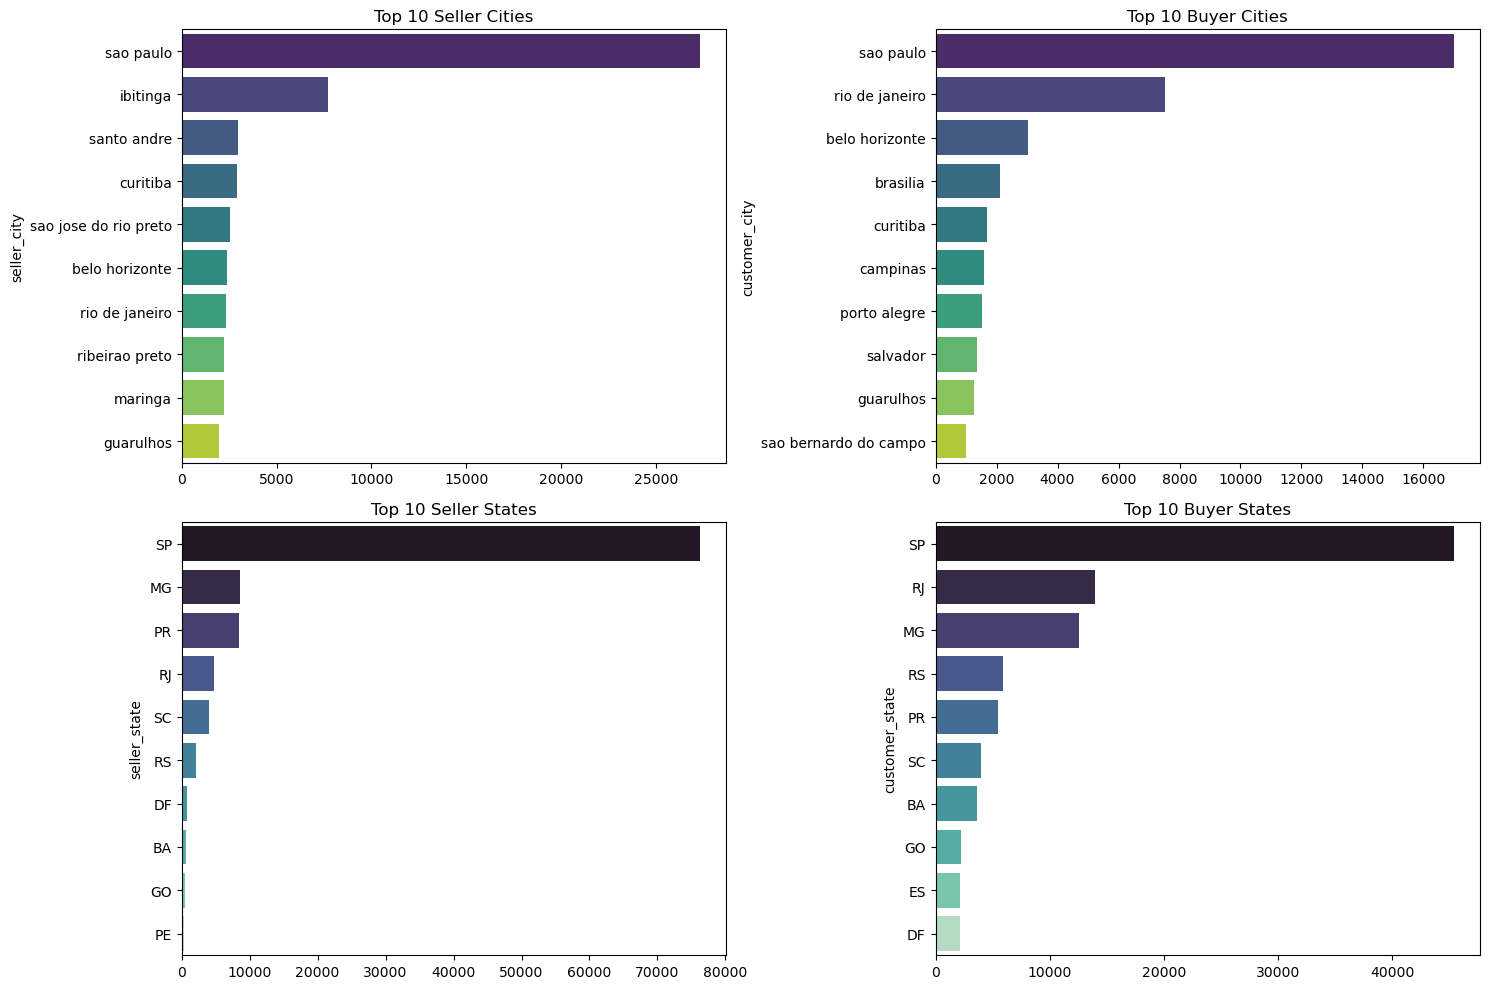

In [10]:
# Load Data
df= pd.read_csv('data/clean/dac_olist_business_development_cleaned.csv')

# Supress warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Analyzing the most common seller and buyer locations
top_seller_cities = df['seller_city'].value_counts().head(10)
top_buyer_cities = df['customer_city'].value_counts().head(10)

top_seller_states = df['seller_state'].value_counts().head(10)
top_buyer_states = df['customer_state'].value_counts().head(10)

# Plotting the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=top_seller_cities.values, y=top_seller_cities.index, palette="viridis").set_title('Top 10 Seller Cities')

plt.subplot(2, 2, 2)
sns.barplot(x=top_buyer_cities.values, y=top_buyer_cities.index, palette="viridis").set_title('Top 10 Buyer Cities')

plt.subplot(2, 2, 3)
sns.barplot(x=top_seller_states.values, y=top_seller_states.index, palette="mako").set_title('Top 10 Seller States')

plt.subplot(2, 2, 4)
sns.barplot(x=top_buyer_states.values, y=top_buyer_states.index, palette="mako").set_title('Top 10 Buyer States')

plt.tight_layout()
plt.show()

From these charts we can infer a few things. In terms of cities Sao Paulo could be considered a saturated market. Both the city of Sao Paulo and the state of Sao Paulo are the top states and cities with the most transactions. However as we go down, we can see that there is a high demand for products at Rio de Janeiro, but the suppliers are not at the same level, which suggests there is possibility of growth there. This discrepency can be seen through out all the cities and states outside of Sao Paulo, which suggests there are many areas where the number of sellers could be increased. This also suggests buyer and seller distribution isn't as balanced outside of Sao Paulo. To further explore this, we can look at the percentage of transactions where buyers buy from sellers within the same city or state. 

In [11]:
# Creating a new column to check if the seller and buyer are in the same city
df['same_city'] = df['seller_city'] == df['customer_city']

# Creating a new column to check if the seller and buyer are in the same state
df['same_state'] = df['seller_state'] == df['customer_state']

# Calculating the percentage of orders from the same city and same state
same_city_percentage = df['same_city'].mean() * 100
same_state_percentage = df['same_state'].mean() * 100

print(f"{same_city_percentage} of orders are from buyers and sellers located in the same city.")
print(f"{same_state_percentage} of orders involve buyers and sellers from the same state.")

5.299877373564713 of orders are from buyers and sellers located in the same city.
36.142283824458396 of orders involve buyers and sellers from the same state.


From these numbers we can see that not a huge percentage buy from the same city, but there is a significant amount of people buying from the same state. Looking at the buyer/seller distribution from before, it is highly likely that if buyers have the option to buy from the same city they would, but the coverage may not be sufficient in their area,  so they opt for the second best option, which is to buy from the same state. This could also mean that buyers could be factoring in shipping costs in their purchases.

Next we will try to calculate transaction volumes.

In [6]:
# Load Data
df= pd.read_csv('data/clean/dac_olist_business_development_cleaned.csv')

# Calculate sale volume for each unique seller geo-coordinate along with city and state
seller_sales_volume = df.groupby(['seller_lat', 'seller_lng', 'seller_city', 'seller_state']).size().reset_index(name='sale_volume')

# Calculate buy volume for each unique buyer geo-coordinate along with city and state
buyer_purchase_volume = df.groupby(['customer_lat', 'customer_lng', 'customer_city', 'customer_state']).size().reset_index(name='buy_volume')

# Save Data Frames
export_seller_csv_path = 'data/calculated_outputs/seller_sales_volume.csv'
seller_sales_volume.to_csv(export_seller_csv_path, index=False)
export_buyer_csv_path = 'data/calculated_outputs/buyer_purchase_volume.csv'  
buyer_purchase_volume.to_csv(export_buyer_csv_path, index=False)

# Display Data Frames
print(seller_sales_volume.head())
print(buyer_purchase_volume.head())

   seller_lat  seller_lng seller_city seller_state  sale_volume
0  -36.605374  -64.283946  santa rosa           RS            4
1  -32.079513  -52.157678  rio grande           RS           16
2  -31.772413  -52.343992     pelotas           RS            2
3  -31.337669  -54.103716        bage           RS            1
4  -30.159469  -50.832839      viamao           RS           76
   customer_lat  customer_lng            customer_city customer_state  \
0    -36.605374    -64.283946               santa rosa             RS   
1    -34.586422    -58.732101              santa maria             RJ   
2    -33.691423    -53.480161                     chui             RS   
3    -33.525601    -53.366420  santa vitoria do palmar             RS   
4    -32.563952    -53.384720                 jaguarao             RS   

   buy_volume  
0          11  
1           1  
2           5  
3          15  
4           8  


In [18]:
# Load Data Frames
import_seller_csv = pd.read_csv('data/calculated_outputs/seller_sales_volume.csv')
import_buyer_csv = pd.read_csv('data/calculated_outputs/buyer_purchase_volume.csv')

# Initialize the map
volume_map = folium.Map(location=[-14.235004, -51.92528], zoom_start=4)

# Function to add scaled circle markers
def add_scaled_circles(df, color, map_object):
    for _, row in df.iterrows():
        # Building popup text and applying a scaling factor for the radius
        if color == 'green':  # Seller
            popup_text = f"Seller in {row['seller_city']}, {row['seller_state']} - Sales Count: {row['sale_volume']}"
            lat_col, lng_col = 'seller_lat', 'seller_lng'
            scaled_radius = np.sqrt(row['sale_volume'])  # Adjust scaling factor as needed
        else:  # Buyer
            popup_text = f"Buyer in {row['customer_city']}, {row['customer_state']} - Purchase Count: {row['buy_volume']}"
            lat_col, lng_col = 'customer_lat', 'customer_lng'
            scaled_radius = np.sqrt(row['buy_volume'])  # Adjust scaling factor as needed
        # Add CircleMarker to the map
        folium.CircleMarker(
            location=[row[lat_col], row[lng_col]],
            radius=scaled_radius,
            popup=popup_text,
            color=color,
            fill=True,
            fill_color=color
        ).add_to(map_object)

# Adding scaled markers for sellers and buyers
add_scaled_circles(import_seller_csv, 'green', volume_map)
add_scaled_circles(import_buyer_csv, 'blue', volume_map)

# Save the map
volume_map.save('maps/buyer_seller_volume_map.html')

In [19]:
# Display Map
IFrame(src='maps/buyer_seller_volume_map.html', width=900, height=500)

Now we can visualize the volume of sales on the map, we can see that the sellers that are doing the most business is concentrated on Brazilian coastline, which coincides to where most of the sellers are, but there are enough purchasing power inland to demand more seller coverage there. 